#### Import libraries

In [1]:
import os
myfile = open("path.txt",mode="r")

datapath,repopath = myfile.readlines()
datapath = datapath.strip("\n")
datapath,repopath

('d:\\', 'd:\\GIT\\TFM')

In [2]:
import os
os.getcwd()

'd:\\GIT\\TFM'

In [3]:
path = os.getcwd()
if path.endswith('TFM') == True:
    !mkdir smote_reports
    !mkdir gsearchcv
else:
    print("Ensure that you are in the /TFM folder")

Ya existe el subdirectorio o el archivo smote_reports.
Ya existe el subdirectorio o el archivo gsearchcv.


In [4]:
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder,LabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, \
                            explained_variance_score,recall_score,f1_score,\
                            precision_score,roc_curve,roc_auc_score,\
                            accuracy_score,confusion_matrix,\
                            classification_report,make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,cross_validate,learning_curve,cross_val_score,GridSearchCV,RepeatedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import modules

pd.set_option('display.max_columns', None)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Load data

In [5]:
df_imbalanced=pd.read_csv(datapath+'df_imbalanced.csv',delimiter=',',encoding='UTF-8-SIG',low_memory=False,index_col=0,nrows=100000)

In [6]:
df_imbalanced.dtypes

Vehicle_Type                   int64
Sex_of_Driver                  int64
Age_Band_of_Driver             int64
Engine_Capacity_(CC)         float64
Age_of_Vehicle               float64
Accident_Severity              int64
Day_of_Week                    int64
Speed_limit                    int64
Daytime                        int64
Road_Surface_Conditions_2      int64
Weather_Conditions_2           int64
Light_Conditions_2             int64
dtype: object

In [7]:
print('Before Upsampling:')
df_imbalanced['Accident_Severity'].value_counts(normalize=True).reset_index()

Before Upsampling:


,index,Accident_Severity
0,2,0.77387
1,1,0.19939
2,0,0.02674


#### *Primero de todo vamos a crear un k-fold con varios modelos de clasificación los cuales nos deolverán el modelo con más score para el dataset desbalanceado.*

LogReg| Mean=0.135282 STD=0.005226
SVC_linear| Mean=0.126151 STD=0.010175
DecTree| Mean=0.773066 STD=0.035892
KNN| Mean=0.342733 STD=0.027606
LinDisc| Mean=0.179564 STD=0.004344
BGG| Mean=0.801034 STD=0.039126
rf| Mean=0.761892 STD=0.033397


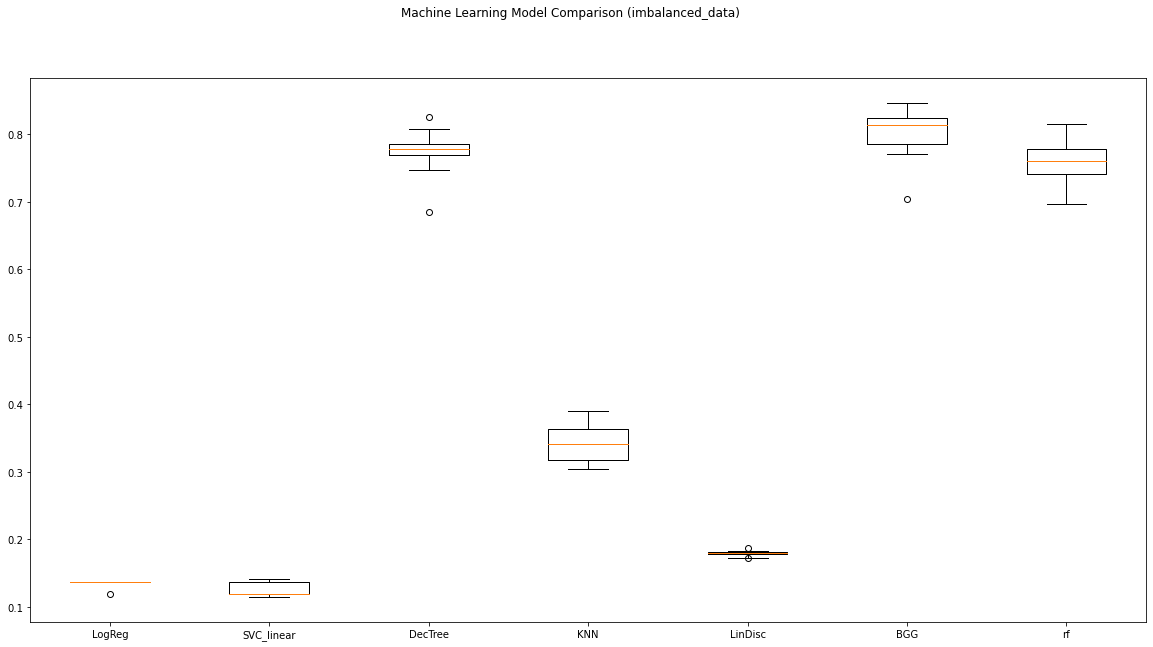

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

from sklearn import model_selection

#read in the data
data_to_use = df_imbalanced
values = data_to_use.values
Y_1 = values[:,0]
X_1 = values[:,1:]

random_seed = 12

outcome = []
model_names = []

models = [
    ('LogReg', LogisticRegression()), 
    ('SVC_linear', LinearSVC()), 
    ('DecTree', DecisionTreeClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('LinDisc', LinearDiscriminantAnalysis()),
    ('BGG', BaggingClassifier()),
    ('rf', RandomForestClassifier())
]


for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10, random_state=random_seed,shuffle=True)
    results = model_selection.cross_val_score(model, X_1, Y_1, cv=k_fold_validation, scoring='f1_macro')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

fig = plt.figure()
fig.suptitle('Machine Learning Model Comparison (imbalanced_data)')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
ax.set_xticklabels(model_names)
plt.show()

# SMOTE OVERSAMPLING

Our last metrics with imbalanced data were bad so we will try with Oversample technique for handling imbalanced data:
In our case we will use Oversampling instead of Undersamping, both have it's pros and cons but with Oversample we won't loose data.


<img src="https://i0.wp.com/dataaspirant.com/wp-content/uploads/2020/08/10-oversampling.png?resize=768%2C407&ssl=1" alt="image info" width="500" />

<img src="https://i1.wp.com/dataaspirant.com/wp-content/uploads/2020/08/17-undersampling.png?resize=768%2C399&ssl=1" alt="image info" width="500" />

[Handling Imbalanced data with python](https://dataaspirant.com/handle-imbalanced-data-machine-learning/#t-1596963627856)

In [12]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

In [13]:
X_k, y_k = modules.target_features(df_imbalanced)
X_res, y_res = oversample.fit_resample(X_k, y_k)

# view synthetic sample class distribution
print('\nAfter Upsampling with SMOTE:'), print(pd.Series(y_res).value_counts())


After Upsampling with SMOTE:
0    77456
1    77456
2    77456
Name: Accident_Severity, dtype: int64


(None, None)

LogReg| Mean=0.464185 STD=0.002821
SVM| Mean=0.391155 STD=0.040108
DecTree| Mean=0.752217 STD=0.002564
KNN| Mean=0.735561 STD=0.002432
LinDisc| Mean=0.460920 STD=0.002454
GaussianNB| Mean=0.453000 STD=0.002417
BGG| Mean=0.796967 STD=0.002834
rf| Mean=0.840043 STD=0.001737


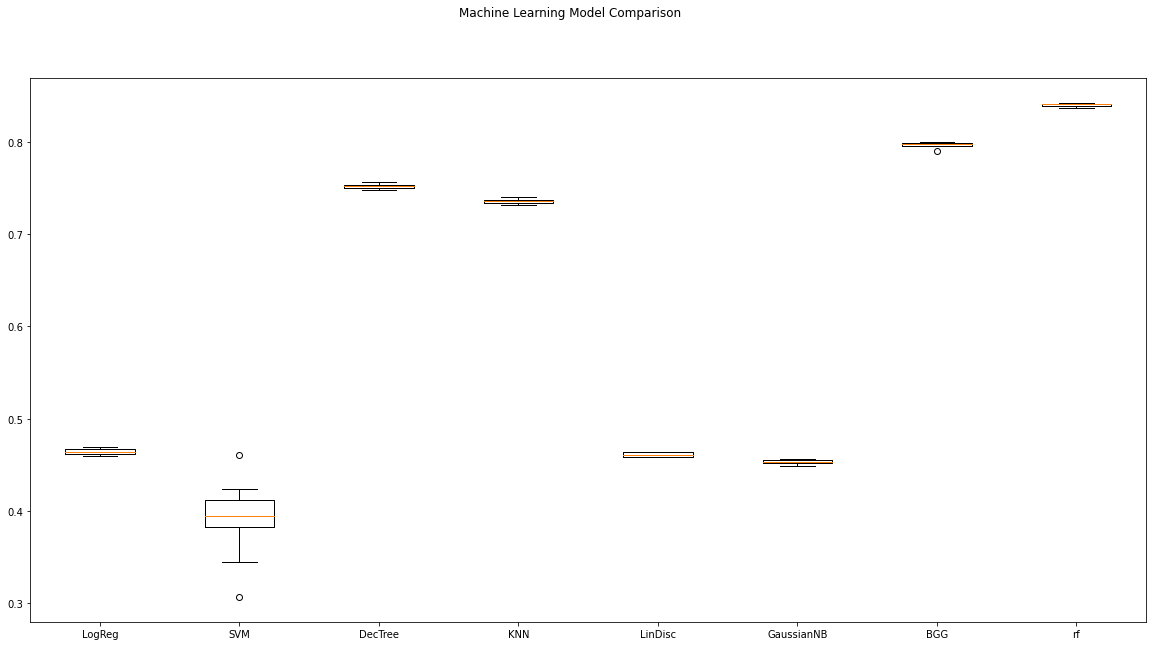

In [45]:
#X,y =  modules.target_features(df_smote)
#oversample = SMOTE()
#X_res, y_res = oversample.fit_resample(X, y)

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


#read in the data
#data_to_use = df_imbalanced
#values = data_to_use.values

Y = y_res.values
X = X_res.values

random_seed = 12

outcome = []
model_names = []

models = [
    ('LogReg', LogisticRegression()), 
    ('SVM', LinearSVC()), 
    ('DecTree', DecisionTreeClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('LinDisc', LinearDiscriminantAnalysis()),
    ('BGG', BaggingClassifier()),
    ('rf', RandomForestClassifier())
]


for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10, random_state=random_seed,shuffle=True)
    results = model_selection.cross_val_score(model, X, Y, cv=k_fold_validation, scoring='f1_macro')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)
    

fig = plt.figure()
fig.suptitle('Machine Learning Model Comparison(Oversampled)')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
ax.set_xticklabels(model_names)
plt.show()

#### *After this plot we'll evaluate every model but obviously the hypertuning will be focused BGG and RF models*

#### *Defining our functions before evaluate our model*

In [8]:
#This functions allow us to make predictions using different models.
#folder selection
    #folder=1 for imb_reports
    #folder=2 for bal_reports
    #folder=3 for smote_reports

def fit_pred_mod(select_model):
  #model selection 
    if select_model == 1:
        model = LogisticRegression(multi_class= "multinomial",solver='lbfgs')
    elif select_model == 2:
        model = DecisionTreeClassifier()
    elif select_model == 3:
        model = RandomForestClassifier(random_state=4, criterion='entropy', n_jobs=-1, class_weight='balanced')
    elif select_model == 4:
        model = BaggingClassifier()
    elif select_model == 5:
        model = LinearSVC()
    elif select_model == 6:
        model = KNeighborsClassifier()
    elif select_model == 7:
        model = MLPClassifier()
        
    folder = 'smote_reports'
        
    numeric_features = num
    categorical_features = cat
    #Handling categorical and numerical data with Pipelines
    numeric_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
    #('imputer', SimpleImputer(strategy='median')),
    #categorical_transformer = LabelEncoder()
    categorical_transformer = Pipeline(steps=[
    
    ('ohe', OneHotEncoder(handle_unknown='ignore'))])
    #('ohe', OneHotEncoder(handle_unknown='ignore'))])
    
    #categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    #categorical_transformer  = StandardScaler()
    preprocessor = ColumnTransformer(
    transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features),])
        
    
    clf = Pipeline(steps=[('preprocessor', preprocessor),
    ('classifier', model)])
    clf.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    
   
    #clf['preprocessor'].transformers_[1][1]['ohe'].get_feature_names(categorical_features)
    #print(clf["preprocessor"].transformers_[1][1]['scaler'].get_feature_names(numeric_features))
    
    
## Taking the feature names for the feature importance plot
    
    BASE_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

    feature_collection = FeatureUnion([('BASE_pipeline', BASE_pipeline)])

    pipeline_collection = Pipeline([('feats', feature_collection),('clf',model)])

    
    
    categorical_features_final = dict(pipeline_collection.named_steps['feats']\
                                        .transformer_list)['BASE_pipeline'].named_steps['preprocessor']\
                                        .transformers_[1][1]\
                                        .named_steps['ohe']\
                                        .get_feature_names(categorical_features)
    
    numerical_features = [col for col in X_train.columns if X_train[col].dtype.name == "float64"]
    categorical_features_final = categorical_features_final.tolist()
    final_features_list = numerical_features + categorical_features_final
    
    eval_score(X_train, X_test, y_train, y_test, clf, yhat,select_model,folder,final_features_list)
    
    #if select_model in [2,3]:
#        features_col =list((clf['preprocessor'].transformers_[1][1]['ohe'].get_feature_names(categorical_features)))
 #       print(features_col)
  #      fig,ax = plt.subplots()
   #     feat_importances = pd.Series(clf.steps[1][1].feature_importances_, index=(features_col.append(num)))
    #    feat_importances.sort_values().plot(kind='barh', figsize=(20,20),ax=ax)
     #   plt.xlabel('Relative Feature Importance with {}'.format(model));
      #  plt.show();
    
    
    
    
    
    
    
          
    #ohe = (clf.named_steps['preprocessor'].named_transformers_['cat'])
    #feature_names = ohe.get_feature_names(input_features=categorical_features)
    #feature_names = np.r_[feature_names, numeric_features]

    #feature_importances = (
   #     clf.named_steps['classifier'].feature_importances_)
   # sorted_idx = feature_importances.argsort()

   # y_ticks = np.arange(0, len(feature_names))
   # fig, ax = plt.subplots()
   # ax.barh(y_ticks, feature_importances[sorted_idx])
   # ax.set_yticks(y_ticks)
   # ax.set_yticklabels(feature_names[sorted_idx])
   # ax.set_title("Feature Importances")
   # fig.tight_layout()
   # plt.show()     
    

    
    return

In [9]:
def eval_score(X_train, X_test, y_train, y_test, classifier,yhat,select_model,folder,final_features_list):
    #  classifier.fit(X_train, y_train)
#    preds = classifier.predict(X_test)
#    probs = classifier.predict_proba(X_test)
    
    if select_model == 1:
        modelts = 'LogisticRegression' # no feature importance
    elif select_model == 2:
        modelts = 'DecisionTreeClassifier'
    elif select_model == 3:
        modelts = 'RandomForestClassifier'
    elif select_model == 4:
        modelts = 'BaggingClassifier' # no feature importance
    elif select_model == 5:
        modelts = 'LinearSVC' # no feature importance
    elif select_model == 6:
        modelts = 'KNeighborsClassifier' # no feature importance
    elif select_model == 7:
        modelts = 'MPLC' # no feature importance
          
    print("{}".format(modelts))
    n_class = 3
    print("model score: %.3f" % classifier.score(X_test, y_test))
    cr = classification_report(y_test, yhat)
    print(cr)
    
    f = open(folder+'/report_'+modelts+'.txt', 'w')
    f.write('Classification Report {}\n\n{}'.format(modelts ,cr))
    f.close()
    
  
    fig1,ax = plt.subplots(1,2,figsize=(15,5.5))
    fig1.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.subplots_adjust(wspace=1000, hspace=1000)
    
    if select_model in [1,2,3,4,6,7]:
        # roc curve for classes
        fpr = {}
        tpr = {}
        thresh ={}
        probs = classifier.predict_proba(X_test)
        for i in range(n_class):    
            fpr[i], tpr[i], thresh[i] = roc_curve(y_test, probs[:,i], pos_label=i)
        #plotting Roc Curve     
        plt.subplot(121)
        #plt.subplots_adjust(wspace=10, hspace=10)
        plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Fatal')
        plt.plot(fpr[1], tpr[1], linestyle='--',color='orange', label='Serious')
        plt.plot(fpr[2], tpr[2], linestyle='--',color='green', label='Slight')
        plt.title('Multiclass ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive rate')
        plt.legend(loc='best')
        #plt.savefig(folder+'/'+ modelts+'Multiclass ROC',dpi=300);
        roc_auc_score(y_test, probs,multi_class='ovo', average='weighted')
    
    #matrix confusion
    matrix = confusion_matrix(y_test, yhat)
    dataframe = pd.DataFrame(matrix, index=['Fatal', 'Serious', 'Slight'], 
                            columns=['Fatal', 'Serious', 'Slight'])
    
    # create matrixconfusion heatmap
    #fig,ax = plt.subplots()
    plt.subplot(122)

    sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.tight_layout(), plt.xlabel('True Values'), plt.ylabel('Predicted Values')
    plt.show()
    fig1.savefig(folder+'/' + modelts +' Multiclass ROC Curve - Confusion Matrix');
    
    
        
    #features importance
    if select_model in [2,3]:
        fig2,ax = plt.subplots()
        feat_importances = pd.Series(classifier.steps[1][1].feature_importances_, index=final_features_list)

        feat_importances.nlargest(n=20).sort_values(ascending=True).plot(kind='barh',color='Orange',width=0.3, figsize=(15,7))
        plt.xlabel('Relative Feature Importance with {}'.format(modelts));
        plt.show();
        
        fig2.savefig(folder+'/'+ modelts+'Feat_import',dpi=50);

    return

In [10]:
##SPLIT y OVERSAMPLING SOBRE LOS DATOS DE ENTRENAMIENTO

In [11]:
#We are doing only Oversample in the training part to ensure that we won't have data leakage
#split in X=features/y=target
X,y =  modules.target_features(df_imbalanced)

# Function that return list of category and numeric columns in a list.
cat,num= modules.return_dtypes_var(X)


def split(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    return X_train, X_test, y_train, y_test

oversample = SMOTE()

#Splitting data into train/test.
X_train, X_test, y_train, y_test = split(X,y)
# Oversampling applyed only in the training data.
X_res, y_res = oversample.fit_resample(X_train, y_train)
X_train, X_test, y_train, y_test = split(X_res,y_res)

Now we only will be focused on the 4 models that previously took the best score.

DecisionTreeClassifier
model score: 0.855
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     14544
           1       0.79      0.82      0.80     14366
           2       0.85      0.81      0.83     14586

    accuracy                           0.85     43496
   macro avg       0.85      0.85      0.85     43496
weighted avg       0.85      0.85      0.85     43496



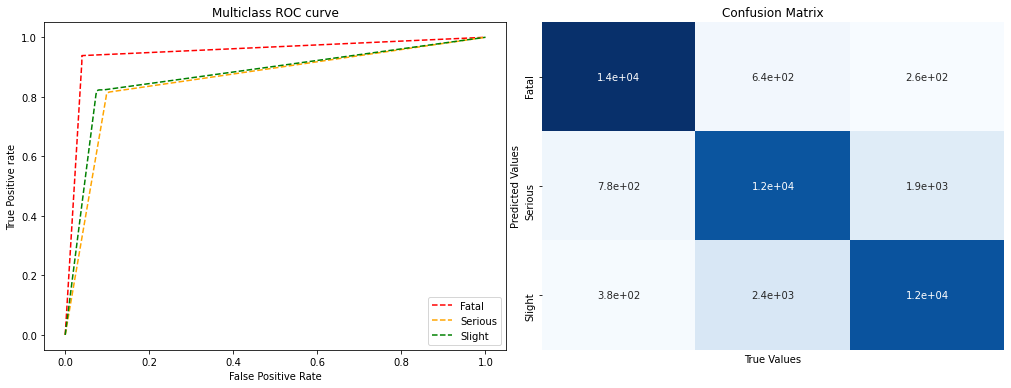

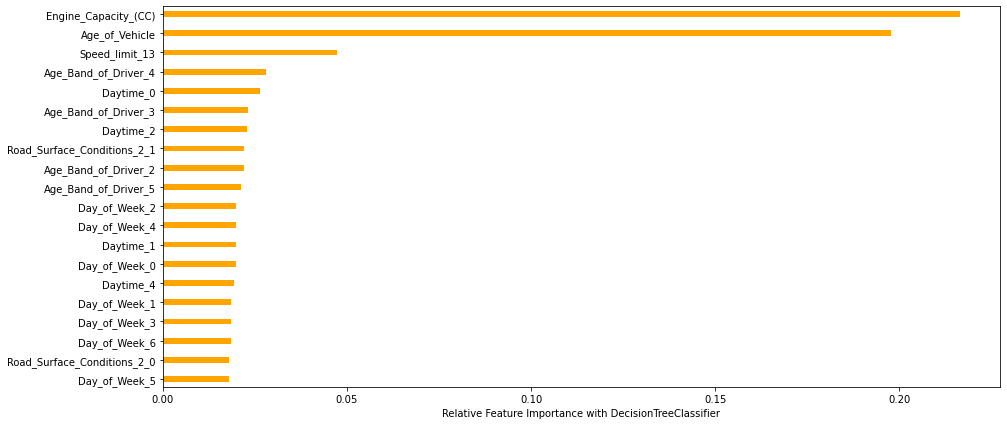

In [12]:
fit_pred_mod(2)

RandomForestClassifier
model score: 0.898
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     14544
           1       0.86      0.86      0.86     14366
           2       0.86      0.86      0.86     14586

    accuracy                           0.90     43496
   macro avg       0.90      0.90      0.90     43496
weighted avg       0.90      0.90      0.90     43496



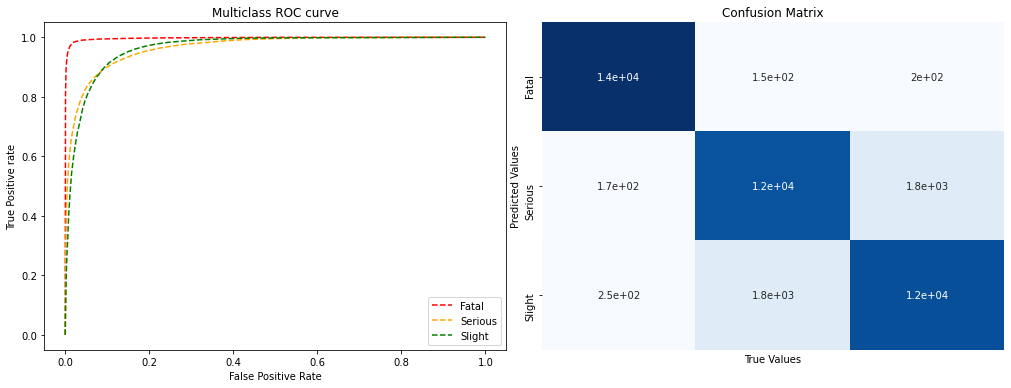

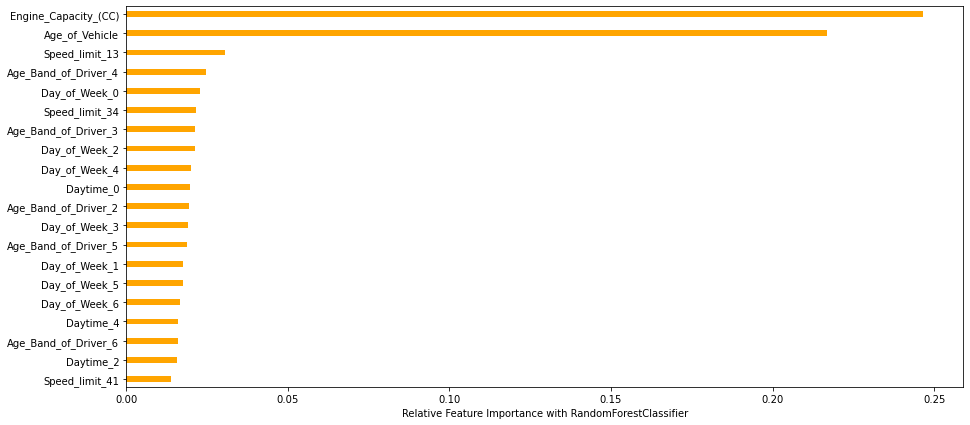

In [13]:
fit_pred_mod(3)

BaggingClassifier
model score: 0.883
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14544
           1       0.83      0.84      0.84     14366
           2       0.87      0.85      0.86     14586

    accuracy                           0.88     43496
   macro avg       0.88      0.88      0.88     43496
weighted avg       0.88      0.88      0.88     43496



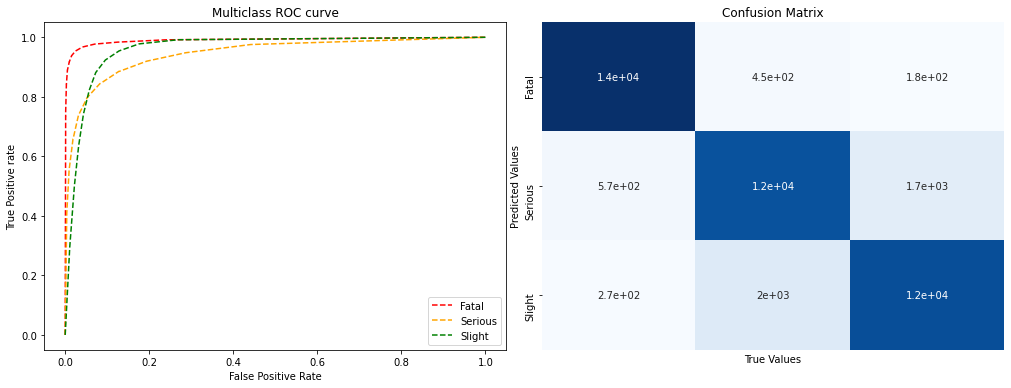

In [14]:
fit_pred_mod(4)

KNeighborsClassifier
model score: 0.816
              precision    recall  f1-score   support

           0       0.90      0.98      0.93     14544
           1       0.74      0.83      0.78     14366
           2       0.81      0.64      0.72     14586

    accuracy                           0.82     43496
   macro avg       0.82      0.82      0.81     43496
weighted avg       0.82      0.82      0.81     43496



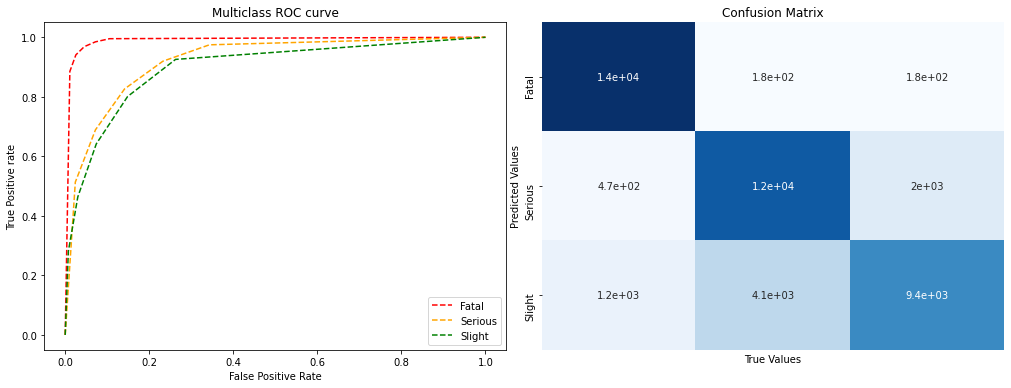

In [15]:
fit_pred_mod(6)

### Pipeline + RepeatedKfold + GridsearchCV

In [18]:
def param_search(select_model):
    
    #MODEL PARAMETERS
    #K-Nearest - Neighborg
    knn_grid = {
        "classifier__n_neighbors" : [5,7,10],
        "classifier__weights" : ['uniform', 'distance']

        }

    #DecisionTreeclassifier
    tree_grid = {
    "classifier__class_weight" : ["balanced",None],
    "classifier__min_samples_split" : [2,4,8],
    "classifier__criterion" : ['gini','entropy'] 
    }

    #Bagging Classifier
    bag_grid = {
    "classifier__n_estimators" : [10,20,30,40]
    }
    
    #Random Forest
 
    rf_grid = {
       "classifier__max_features" : ['sqrt', 'log2'],
        "classifier__n_estimators" : [100,200,300]
    }
    
    #models = [
    #('DecTree', DecisionTreeClassifier()),
    #('Knn', KNeighborsClassifier()),
    #('BagC', BaggingClassifier()),
    #('RandomforestC', RandomForestClassifier())
#]
    if select_model == 1:
        models = DecisionTreeClassifier()
        name="DecisionTreeClassifier"
        grids = tree_grid
    elif select_model ==2:
        models = KNeighborsClassifier()
        name="KNeighborsClassifier"
        grids = knn_grid
    elif select_model == 3:
        models = BaggingClassifier()
        name = "BaggingClassifier"
        grids=bag_grid
    elif select_model == 4:
        name="RandomForestClassifier"
        models = RandomForestClassifier()
        grids=rf_grid
   
    #dtree = DecisionTreeClassifier()
   
    #knn = KNeighborsClassifier()
  
    #bag = BaggingClassifier()
  
    #rf = RandomForestClassifier()
       
    #models = [dtree,knn,bag,rf]
    
    numeric_features = num
    categorical_features = cat
    #Handling categorical and numerical data with Pipelines
    numeric_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
    #('imputer', SimpleImputer(strategy='median')),
    #categorical_transformer = LabelEncoder()
    categorical_transformer = Pipeline(steps=[
    
    ('ohe', OneHotEncoder(handle_unknown='ignore'))])
    #('ohe', OneHotEncoder(handle_unknown='ignore'))])
    
    #categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    #categorical_transformer  = StandardScaler()
    preprocessor = ColumnTransformer(
    transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features),])
    
   
    
    random_seed = 12
    #cv = KFold(n_splits=10, random_state=random_seed,shuffle=True)
    cv = RepeatedKFold(n_splits=10,n_repeats=3,random_state=random_seed)
    
    #grids = [tree_grid,knn_grid,bag_grid,rf_grid]
    col = 0
    
    clf = Pipeline(steps=[('preprocessor', preprocessor)
                                  ,('classifier',models)])
    grid_search = GridSearchCV(clf, 
                          param_grid=grids,
                          cv=cv,scoring='f1_macro',
                          error_score=0,n_jobs=-1)

    grid_clf = grid_search.fit(X_train, y_train)
    print("{} f1_macro_score: {}".format(name,grid_search.best_score_))    
    print("{}: {}".format(name,grid_search.best_params_)) 
    with open("gsearchcv/gsearchcv_scores.txt", "a") as f:#probarlo
        f.write('\nModel: {} \nBest_Score: {}\nBest_param: {}\n'.format(name ,grid_search.best_score_,grid_search.best_params_))
    print("Train score: ", grid_search.score(X_train,y_train))
    print("Test score: ", grid_search.score(X_test,y_test))

In [16]:
param_search(4)

RandomForestClassifier f1_macro_score: 0.8903909468394513
RandomForestClassifier: {'classifier__max_features': 'sqrt', 'classifier__n_estimators': 300}
Train score:  0.9961041197777726
Test score:  0.8982138634896156


In [17]:
param_search(3)

BaggingClassifier f1_macro_score: 0.8919736874850777
BaggingClassifier: {'classifier__n_estimators': 40}
Train score:  0.9959203955077057
Test score:  0.897880018477527


In [18]:
param_search(1)

DecisionTreeClassifier f1_macro_score: 0.839178816004794
DecisionTreeClassifier: {'classifier__class_weight': 'balanced', 'classifier__criterion': 'gini', 'classifier__min_samples_split': 2}
Train score:  0.996103465269544
Test score:  0.8442361389945229


In [14]:
param_search(2)

KNeighborsClassifier f1_macro_score: 0.8542434366081204
KNeighborsClassifier: {'classifier__n_neighbors': 5, 'classifier__weights': 'distance'}
Train score:  0.9960958338598819
Test score:  0.8632354967924049


# Validation curve

In [3]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve


In [ ]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(
    , X, y, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

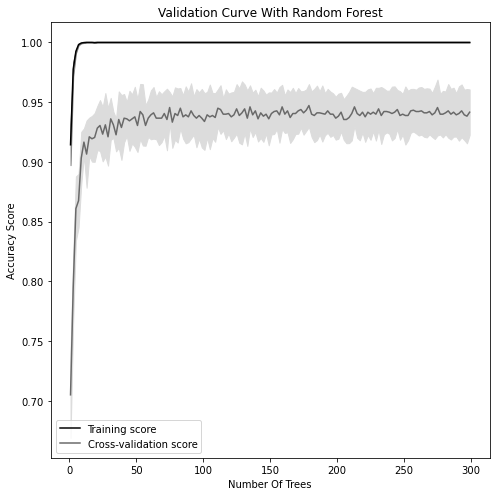

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

 
param_range = np.arange(1, 300, 2)

train_scores, test_scores = validation_curve(RandomForestClassifier(max_features="sqrt"),
                                  X, y, param_name="n_estimators", param_range=param_range,
                                  cv=4, scoring="accuracy", n_jobs=-1)
    
    
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
    
plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")
 
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [2]:
clf_1 = RandomForestClassifier(n_estimators=300,max_features="sqrt", random_state=42)
clf_1.fit(X_train, y_train)
# Number of folds for cross validation
num_folds = 4

NameError: name 'RandomForestClassifier' is not defined

In [67]:
def plot_curve(ticks, train_scores, test_scores):
    train_scores_mean = -1 * np.mean(train_scores, axis=1)
    train_scores_std = -1 * np.std(train_scores, axis=1)
    test_scores_mean = -1 * np.mean(test_scores, axis=1)
    test_scores_std = -1 * np.std(test_scores, axis=1)

    plt.figure()
    plt.fill_between(ticks, 
                     train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(ticks, 
                     test_scores_mean - test_scores_std, 
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(ticks, train_scores_mean, 'b-', label='Training score')
    plt.plot(ticks, test_scores_mean, 'r-', label='Test score')
    plt.legend(fancybox=True, facecolor='w')

    return plt.gca()


In [68]:
def plot_validation_curve(clf, X, y, param_name, param_range, scoring='roc_auc'):
    #plt.xkcd()
    ax = plot_curve(param_range, *validation_curve(clf, X, y, cv=num_folds, 
                                                   scoring=scoring, 
                                                   param_name=param_name, 
                                                   param_range=param_range, n_jobs=-1))
    ax.set_title('')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlim(2,12)
    ax.set_ylim(-0.97, -0.83)
    ax.set_ylabel('Error')
    ax.set_xlabel('Model complexity')
    ax.text(9, -0.94, 'Overfitting', fontsize=22)
    ax.text(3, -0.94, 'Underfitting', fontsize=22)
    ax.axvline(7, ls='--')
    plt.tight_layout()
    

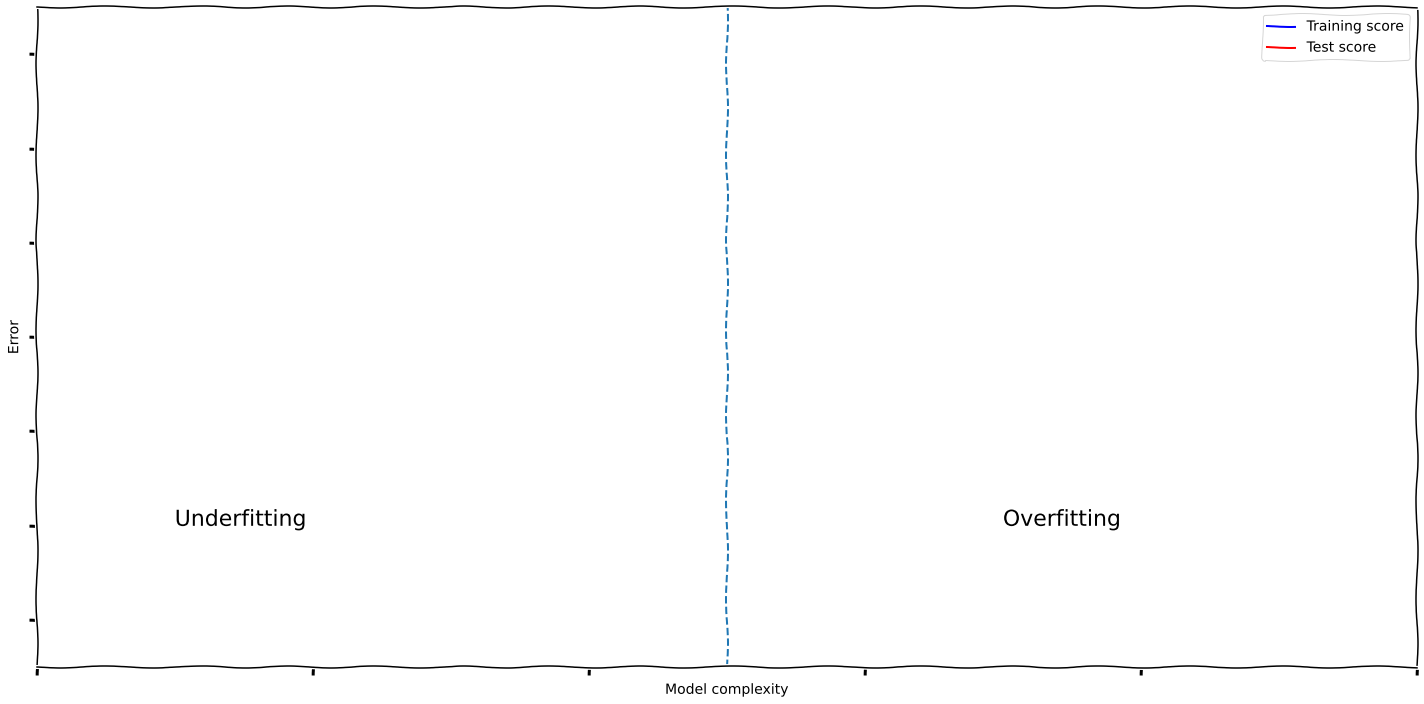

In [69]:
plot_validation_curve(clf_1, X_train, y_train, param_name='n_estimators', param_range=range(100,500,50))

In [1]:
for i, pred in enumerate(clf.staged_decision_function(X_test)):
    test_score[i] = clf.loss_(y_test, pred)

for i, pred in enumerate(clf.staged_decision_function(X_train)):
    train_score[i] = clf.loss_(y_train, pred)

plot(test_score)
plot(train_score)
legend(['test score', 'train score'])

NameError: name 'clf' is not defined